# Geospatial ES|QL

In [6]:
from elasticsearch import Elasticsearch
import os

# Login details
ES_URL=os.getenv("ES_URL","http://elasticsearch:9200") #""
KB_URL=os.getenv("KB_URL","http://kibana:5601") #"https://foss4geurope.kb.us-central1.gcp.cloud.es.io"

# API key is preferred but some Kibana operations require user/password
ES_APIKEY=os.getenv("ES_APIKEY")
ES_USER=os.getenv("ES_USER","elastic")
ES_PASS=os.getenv("ES_PASS","changeme")
ES_AUTH=(ES_USER, ES_PASS)

# Load the client and some cluster details
client = Elasticsearch(hosts=[ES_URL], api_key=ES_APIKEY)
c_info = client.info()
is_serverless = c_info['version']['build_flavor'] == 'serverless'
print(f"Elasticsearch URL: {ES_URL}")
print(f"Cluster name: {c_info['name']}")
print(f"Version: {c_info['version']['number'] if not is_serverless else "serverless"}")

# Load the ESQL helper
from helpers import esql as esql_query
from functools import partial

esql = partial(esql_query, client=client)

Elasticsearch URL: http://elasticsearch:9200
Cluster name: 85861244b50d
Version: 9.0.3


CPU times: user 84.9 ms, sys: 3.99 ms, total: 88.8 ms
Wall time: 125 ms


<Axes: >

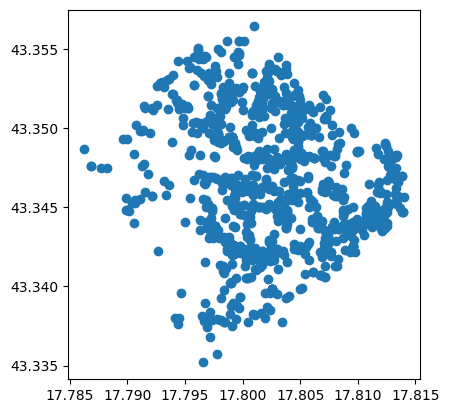

In [7]:
%%time
table = esql(
    """
    FROM places-bosnia
    | WHERE ST_INTERSECTS(
          geometry,
          "POLYGON((17.78514 43.34976, 17.79715 43.33317, 17.81638 43.34637, 17.80046 43.35759, 17.78514 43.34976))"::geo_shape
      )
    | KEEP name, category, geometry
    | LIMIT 50000
    """, use_arrow=True, geometry_col="geometry")
table.head()
table.plot()